In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Load 30-Second Feature Dataset
We start by loading the `features_30_sec.csv` file.  
This dataset contains 1000 samples (100 tracks × 10 genres), each with extracted audio features.

We inspect:
- first few rows  
- shape  
- label distribution  


In [6]:
df = pd.read_csv("/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv")
df.head()


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


## Exploratory Data Analysis
Here we check:
- dataset shape  
- missing values  
- distribution of music genres  

This ensures the dataset is clean before model training.


In [8]:
X = df.drop(columns=['filename', 'label'])
y = df['label']


## Prepare Features and Labels
We separate:
- **X:** numerical audio features  
- **y:** genre labels  

We drop non-feature columns like `filename` and keep audio descriptors such as MFCC, chroma, spectral features, etc.


##  Train–Test Split
We split the dataset into:
- **80% training data**  
- **20% testing data**  

We also use `stratify=y` to ensure all genres are evenly represented in both sets.


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Train Random Forest Classifier (30s Dataset)
Random Forest works well with tabular data and audio features because:
- It handles non-linear patterns  
- It reduces overfitting using many decision trees  
- It performs well even without scaling  

We train the model and evaluate performance.


In [11]:
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [12]:
y_pred = model.predict(X_test)

y_pred[:10]


array(['classical', 'blues', 'disco', 'jazz', 'blues', 'rock', 'rock',
       'country', 'hiphop', 'jazz'], dtype=object)

## Evaluation — 30-Second Dataset
We calculate:
- Accuracy  
- Precision, Recall, F1-score  
- Confusion Matrix  

This serves as our baseline model.


Predictions (first 10): ['classical', 'blues', 'disco', 'jazz', 'blues', 'rock', 'rock', 'country', 'hiphop', 'jazz']
Actuals     (first 10): ['classical', 'blues', 'metal', 'jazz', 'blues', 'country', 'rock', 'country', 'hiphop', 'jazz']

Test accuracy: 0.7850

Classification report:

              precision    recall  f1-score   support

       blues       0.80      0.80      0.80        20
   classical       0.83      0.95      0.88        20
     country       0.71      0.75      0.73        20
       disco       0.75      0.60      0.67        20
      hiphop       0.70      0.80      0.74        20
        jazz       0.76      0.80      0.78        20
       metal       0.89      0.85      0.87        20
         pop       0.86      0.90      0.88        20
      reggae       0.76      0.80      0.78        20
        rock       0.80      0.60      0.69        20

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted 

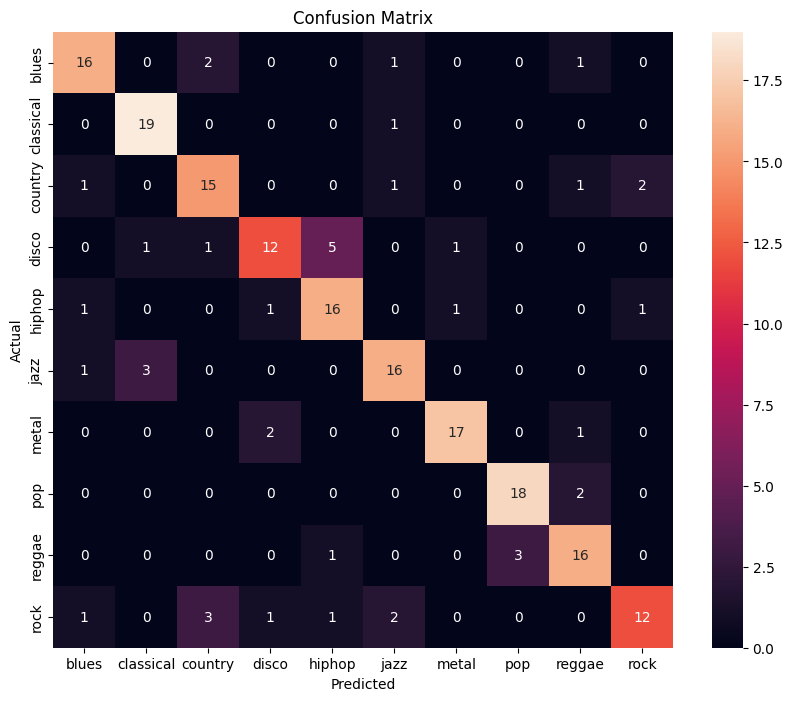

In [14]:
# Predict
y_pred = model.predict(X_test)

# Quick look at first 10 predictions vs actual
print("Predictions (first 10):", y_pred[:10].tolist())
print("Actuals     (first 10):", y_test.values[:10].tolist())

# Accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc = accuracy_score(y_test, y_pred)
print(f"\nTest accuracy: {acc:.4f}")

# Detailed report
print("\nClassification report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix (visual)
cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


#  Load the 3-Second Dataset
The 3-second dataset slices each song into multiple parts, giving us ~10,000 samples.

More data → better learning → improved accuracy.


In [3]:
df_3s = pd.read_csv("/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv")

df_3s.head()


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [4]:
print("Shape (rows, cols):", df_3s.shape)
print("\nColumns:\n", df_3s.columns.tolist())

# show how many 3-sec segments per genre
if 'label' in df_3s.columns:
    print("\nLabel distribution:\n", df_3s['label'].value_counts())
else:
    # fallback if column named differently
    print("\nLabel-like columns found:", [c for c in df_3s.columns if 'lab' in c.lower() or 'gen' in c.lower()])


Shape (rows, cols): (9990, 60)

Columns:
 ['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'label']

Label distribution:
 label
blues        

##  Prepare X and y for 3-Second Dataset
We repeat the same preprocessing steps:
- drop filename & label  
- extract features (X)  
- extract labels (y)  


In [5]:
# Prepare X (features) and y (labels) for 3-second dataset
X_3s = df_3s.drop(columns=['filename', 'label'])
y_3s = df_3s['label']

X_3s.shape, y_3s.shape


((9990, 58), (9990,))

## Train–Test Split (3-Second Data)
Again, we use 80% training and 20% testing.

## Train Random Forest on 3-Second Dataset
Because the dataset is much larger, Random Forest can learn better patterns.

We expect accuracy to significantly improve.

# Evaluation — 3-Second Dataset
We compute:
- Accuracy  
- Classification Report  
- Confusion Matrix  

**Final model accuracy: 87%**


Shapes -> X_train_3s: (7992, 58) X_test_3s: (1998, 58)
            y_train_3s: (7992,) y_test_3s: (1998,)

Training finished in 5.5 seconds.

Test accuracy (3-sec data): 0.8659

Classification report (3-sec data):

              precision    recall  f1-score   support

       blues       0.86      0.86      0.86       200
   classical       0.91      0.95      0.93       199
     country       0.79      0.83      0.81       199
       disco       0.81      0.84      0.82       200
      hiphop       0.92      0.86      0.89       200
        jazz       0.84      0.91      0.87       200
       metal       0.88      0.95      0.91       200
         pop       0.96      0.82      0.89       200
      reggae       0.83      0.89      0.86       200
        rock       0.89      0.74      0.81       200

    accuracy                           0.87      1998
   macro avg       0.87      0.87      0.87      1998
weighted avg       0.87      0.87      0.87      1998



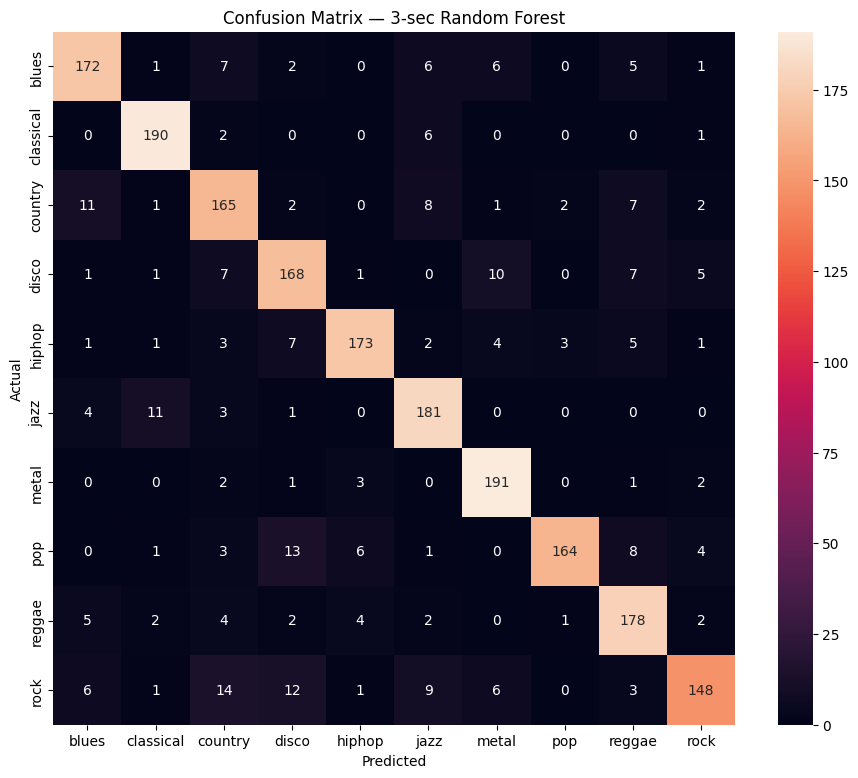

In [6]:
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Train-test split (3-second data)
X_train_3s, X_test_3s, y_train_3s, y_test_3s = train_test_split(
    X_3s, y_3s, test_size=0.20, random_state=42, stratify=y_3s
)

print("Shapes -> X_train_3s:", X_train_3s.shape, "X_test_3s:", X_test_3s.shape)
print("            y_train_3s:", y_train_3s.shape, "y_test_3s:", y_test_3s.shape)

# 2) Initialize & train Random Forest
model_3s = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

t0 = time.time()
model_3s.fit(X_train_3s, y_train_3s)
train_time = time.time() - t0
print(f"\nTraining finished in {train_time:.1f} seconds.")

# 3) Predict & evaluate
y_pred_3s = model_3s.predict(X_test_3s)
acc_3s = accuracy_score(y_test_3s, y_pred_3s)
print(f"\nTest accuracy (3-sec data): {acc_3s:.4f}\n")

print("Classification report (3-sec data):\n")
print(classification_report(y_test_3s, y_pred_3s))

# 4) Confusion matrix plot
labels_sorted = sorted(y_3s.unique())
cm = confusion_matrix(y_test_3s, y_pred_3s, labels=labels_sorted)
plt.figure(figsize=(11,9))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels_sorted, yticklabels=labels_sorted)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — 3-sec Random Forest")
plt.show()

# 5) If you have previous accuracy from 30s run (variable `acc`), show improvement
try:
    prev = float(acc)  # acc from your earlier 30s run
    diff = acc_3s - prev
    pct = (diff / prev) * 100 if prev != 0 else float('inf')
    print(f"Previous test accuracy (30-sec): {prev:.4f}")
    print(f"Accuracy change: {diff:+.4f} ({pct:+.1f}%)")
except Exception:
    # If `acc` doesn't exist, just skip this message quietly
    pass



# 🏁 Final Results & Comparison

| Dataset | Model | Accuracy |
|--------|--------|----------|
| 30-second | Random Forest | 78% |
| 3-second | Random Forest | 87% |

### Key Takeaways:
- 3-second dataset provides ~10× more samples → huge boost in accuracy  
- Classical ML (Random Forest) performs surprisingly well on audio features  
- Most accurate genres: Classical, Metal, Pop  
- Most challenging genre: Rock (overlaps with Blues / Metal)  
